In [1]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing import image
from keras.layers import Input, Lambda ,Dense ,Flatten , Dropout , GlobalAveragePooling2D

In [2]:
#vgg 16 model
classifier_vgg16 = VGG16(input_shape= (64,64,3),include_top=False,weights='imagenet')
classifier_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [3]:
#not train top layers
for layer in classifier_vgg16.layers:
    layer.trainable = False

In [4]:
#adding extra layers for our class/images
main_model = classifier_vgg16.output
main_model = GlobalAveragePooling2D()(main_model)
main_model = Dense(1024,activation='relu')(main_model)
main_model = Dense(1024,activation='relu')(main_model)
main_model = Dense(512,activation='relu')(main_model)
main_model = Dropout(0.5)(main_model)
main_model = Dense(4,activation='softmax')(main_model)

In [5]:
#compiling
from tensorflow.keras.optimizers.legacy import Adam
model = Model(inputs = classifier_vgg16.input , outputs = main_model)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Part 2 - Fitting the CNN to the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#use the image data generator to import the images from the dataset
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
#makes sure you provide the same target as initialised for the image size
training_set = train_datagen.flow_from_directory('C:\\Users\\hites\\OneDrive\\Desktop\\SPJIMR Docs\\Subjects\\Python Classes\\AI ML\\Project Work\\Train',
                                                 target_size=(64, 64),
                                                 batch_size=15,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('C:\\Users\\hites\\OneDrive\\Desktop\\SPJIMR Docs\\Subjects\\Python Classes\\AI ML\\Project Work\\Test',
                                            target_size=(64, 64),
                                            batch_size=10,
                                            class_mode='categorical',
                                            shuffle=False)

Found 96 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [8]:
obj_label_dict = {
    'hitesh': 0,
    'ishan': 1,
    'randeep': 2,
    'saloni':3
}

In [9]:
#fit the model
#it will take some time to train


nb_train_samples=1190
nb_validation_samples=170
batch_size=50

history = model.fit(training_set,
                              validation_data=test_set,
                              epochs=30,
                              validation_steps=None)

Epoch 1/30
7/7 [==============================] - 10s 544ms/step - loss: 1.7008 - accuracy: 0.2396 - val_loss: 1.4446 - val_accuracy: 0.3500
Epoch 2/30
7/7 [==============================] - 3s 396ms/step - loss: 1.4077 - accuracy: 0.3333 - val_loss: 1.3051 - val_accuracy: 0.4000
Epoch 3/30
7/7 [==============================] - 3s 432ms/step - loss: 1.2770 - accuracy: 0.4062 - val_loss: 1.1561 - val_accuracy: 0.5500
Epoch 4/30
7/7 [==============================] - 3s 365ms/step - loss: 1.0767 - accuracy: 0.5833 - val_loss: 0.9936 - val_accuracy: 0.7000
Epoch 5/30
7/7 [==============================] - 3s 360ms/step - loss: 0.8889 - accuracy: 0.6562 - val_loss: 0.9597 - val_accuracy: 0.7000
Epoch 6/30
7/7 [==============================] - 3s 387ms/step - loss: 0.7510 - accuracy: 0.6771 - val_loss: 0.7311 - val_accuracy: 0.8000
Epoch 7/30
7/7 [==============================] - 3s 392ms/step - loss: 0.7101 - accuracy: 0.6771 - val_loss: 0.9413 - val_accuracy: 0.7000
Epoch 8/30
7/7 [===

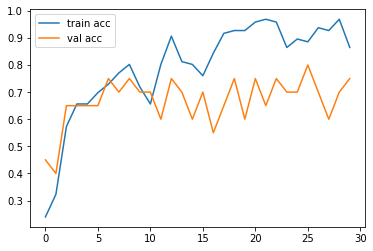

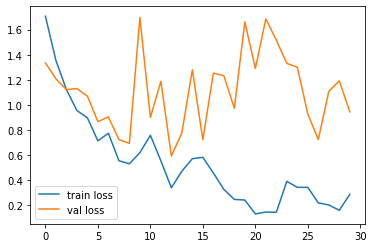

In [13]:
#PLOTTING accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , label = 'train acc')
plt.plot(history.history['val_accuracy'] , label = 'val acc')
plt.legend()
plt.show()

#PLOTTING loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , label = 'train loss')
plt.plot(history.history['val_loss'] , label = 'val loss')
plt.legend()
plt.show()

In [10]:
model.save("C:\\Users\\hites\\OneDrive\\Desktop\\SPJIMR Docs\\Subjects\\Python Classes\\AI ML\\Project Work\\face_recog_vgg_new.h5")

In [11]:
from keras.models import load_model
classifier = load_model('C:\\Users\\hites\\OneDrive\\Desktop\\SPJIMR Docs\\Subjects\\Python Classes\\AI ML\\Project Work\\face_recog_vgg_new.h5')

In [12]:
from PIL import Image 
import base64
from io import BytesIO
import json
import random
import cv2
import numpy as np

In [22]:
import keras
from keras.utils import load_img, img_to_array
img_shape = (64,64)
##load image for prediction
keras.utils.load_img(
    'C:\\Users\\hites\\OneDrive\\Desktop\\SPJIMR Docs\\Subjects\\Python Classes\\AI ML\\Project Work\\Prediction\\Img 2.jpg', 
    grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest"
    )

##preprocess image
name = 'Img 4'
image = keras.utils.load_img("C:\\Users\\hites\\OneDrive\\Desktop\\SPJIMR Docs\\Subjects\\Python Classes\\AI ML\\Project Work\\Prediction\\"+name+'.jpg', grayscale=False, color_mode="rgb", target_size=(224, 224), interpolation="nearest")
import PIL.Image as Image
img = Image.open("C:\\Users\\hites\\OneDrive\\Desktop\\SPJIMR Docs\\Subjects\\Python Classes\\AI ML\\Project Work\\Prediction\\"+name+'.jpg').resize(img_shape)
input_arr = keras.utils.img_to_array(image.resize(img_shape))
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = classifier.predict(input_arr)
print(predictions)
prediction = np.argmax(predictions,axis=1)
print(name,': ', list(obj_label_dict.keys())[list(obj_label_dict.values()).index(prediction)])

1/1 [==============================] - 0s 49ms/step
[[0. 1. 0. 0.]]
Img 4 :  ishan


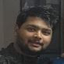

In [23]:
img